In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import cv2
import random
from collections import Counter
from datetime import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [4]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

In [5]:
def flatten_list(matrix):
    flat_list = []
    for row in matrix:
        flat_list += row
    return flat_list

In [6]:
def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    k_nearest_labels = np.array(k_nearest_labels).tolist()
    return Counter(flatten_list(k_nearest_labels)).most_common(1)[0][0]

In [ ]:
import os

clear_sky_images = os.listdir("../resources/cloud-images/cloud-classifier-1/clear_sky")
cloud_images = os.listdir("../resources/cloud-images/cloud-classifier-1/cloud")


labeled_data = {}

for i in clear_sky_images:
    labeled_data[i] =  [{'label': 'clear_sky'}]

for i in cloud_images:
    labeled_data[i] =  [{'label': 'cloud'}]


698


../resources/cloud-images/cloud-classifier-1/clear_sky/A_img317.png


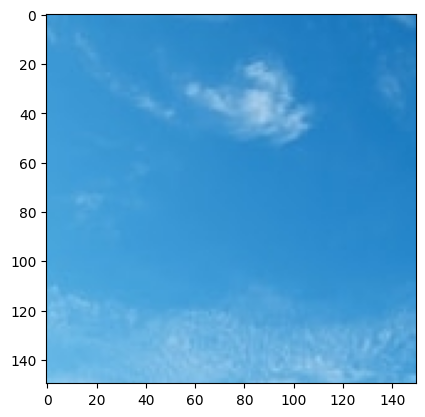

In [8]:
random_filename = '../resources/cloud-images/cloud-classifier-1/' + random.choice(["cloud/" + random.choice(cloud_images), "clear_sky/" + random.choice(clear_sky_images)])
print(random_filename)

sample_image = cv2.imread(random_filename)
image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

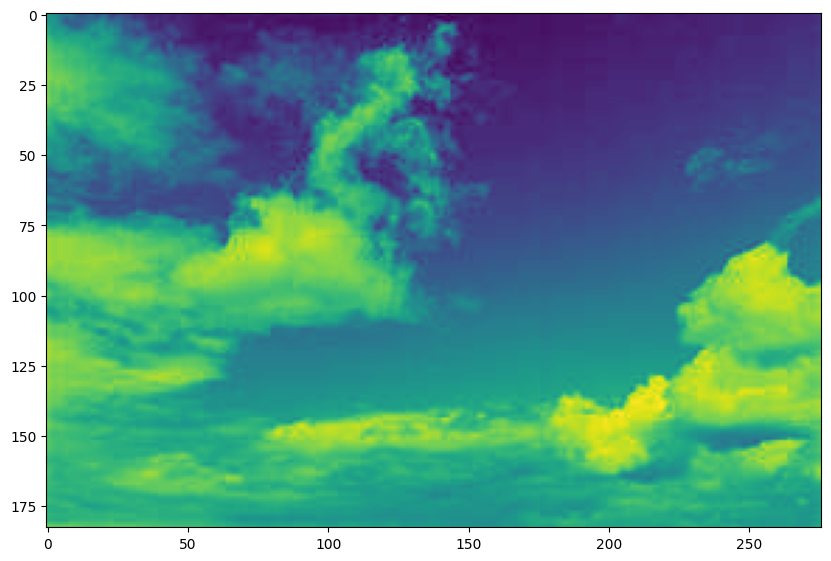

In [7]:
# Converting the image to grayscale
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(sample_image)
plt.show()

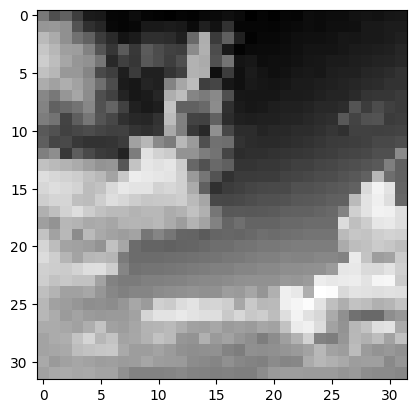

In [8]:
#Resizing the image and changing the colour map to gray
sample_image = cv2.resize(sample_image, (32, 32))
plt.imshow(sample_image, cmap = "gray")
plt.show()

In [9]:
pixels = sample_image.flatten()
pixels

array([169, 145, 156, ..., 180, 180, 178], shape=(1024,), dtype=uint8)

In [ ]:
train_images = []
train_labels = []
class_object = ['clear_sky', 'cloud']

start_datetime = datetime.now()

for (i, image_file) in enumerate(labeled_data):
    path = 'resources/cloud-images/cloud-classifier-1/'+ labeled_data[image_file][0]['label'] + '/' + image_file
    print(path)
    image = cv2.imread(path)
    plt.imshow(image)
    plt.show()
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    label = class_object.index(labeled_data[image_file][0]['label'])
    tmp_label = labeled_data[image_file][0]['label']
    image = cv2.resize(image, (32, 32))
    pixels = image.flatten()
    train_images.append(pixels)
    train_labels.append(label)
    print('Loaded...', '\U0001F483', 'Image', str(i+1), 'is a', tmp_label)
    plt.imshow(image)
    plt.show()

end_datetime = datetime.now()

In [11]:
print('Image Processing Duration: ' + str(end_datetime-start_datetime))

Image Processing Duration: 0:01:00.180638


In [12]:
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels)


In [13]:
train_labels = train_labels.astype(int)
train_labels = train_labels.reshape((train_labels.size,1))

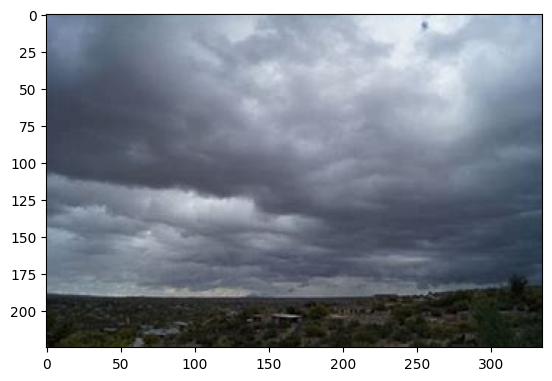

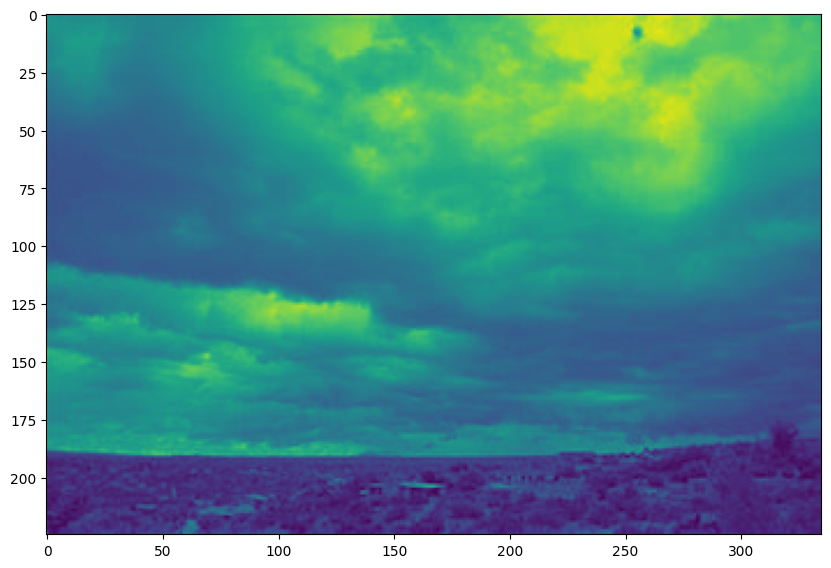

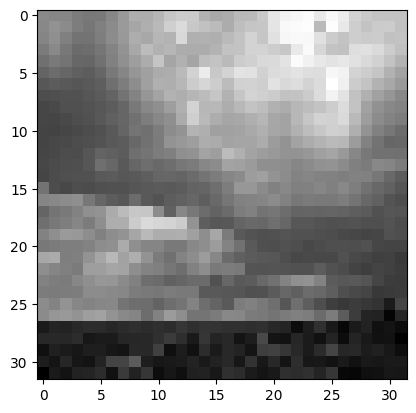

In [14]:
# preparing test image for manual testing
test_image = cv2.imread('labs/test_image1.jpg')
image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

# grey scaling it
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(test_image)
plt.show()

#resizing it and changin the colour mapping
test_image = cv2.resize(test_image, (32, 32))
plt.imshow(test_image, cmap = "gray")
plt.show()

test_point = test_image.flatten()


In [15]:
# Test
k = 5

prediction = knn_predict(train_images, train_labels, test_point, k)
print(class_object[prediction])


cloud


In [16]:
# Sk Learn
test_size = 0.3

train_samples, test_samples, train_samples_labels, test_labels = train_test_split(
    train_images, train_labels, test_size=test_size, random_state=42)

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_samples, train_samples_labels)

# Predict and evaluate
y_pred = knn.predict(test_samples)
print(f"Test Accuracy (k=5): {accuracy_score(test_labels, y_pred):.5f}")

Test Accuracy (k=5): 0.78095


/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [18]:
start_datetime = datetime.now()

# Range of k values to try
k_range = range(1, 10)
knn = cv2.ml.KNearest_create()
knn.train(train_samples, cv2.ml.ROW_SAMPLE, train_samples_labels)
k_result = []

for k in k_range:
    ret,result,neighbours,dist = knn.findNearest(test_samples,k=k)
    k_result.append(result)
flattened = []
for res in k_result:
    flat_result = [item for sublist in res for item in sublist]
    flattened.append(flat_result)

end_datetime = datetime.now()
print('Training Duration: ' + str(end_datetime-start_datetime))


Training Duration: 0:00:00.022030


In [19]:
## create an empty list to save accuracy and the confusion matrix
accuracy_res = []
con_matrix = []

for k_res in k_result:
    label_names = [0, 1]
    cmx = confusion_matrix(test_labels, k_res, labels=label_names)
    con_matrix.append(cmx)
    ## get values for when we predict accurately
    matches = k_res==test_labels
    correct = np.count_nonzero(matches)
    ## calculate accuracy
    accuracy = correct*100.0/result.size
    accuracy_res.append(accuracy)
## store accuracy for later when we create the graph
res_accuracy = {k_range[i]: accuracy_res[i] for i in range(len(k_range))}
list_res = sorted(res_accuracy.items())

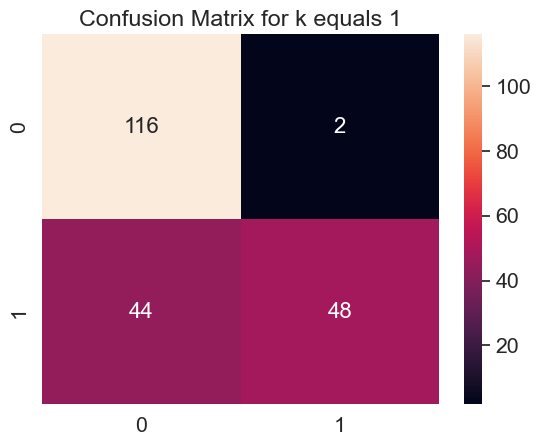

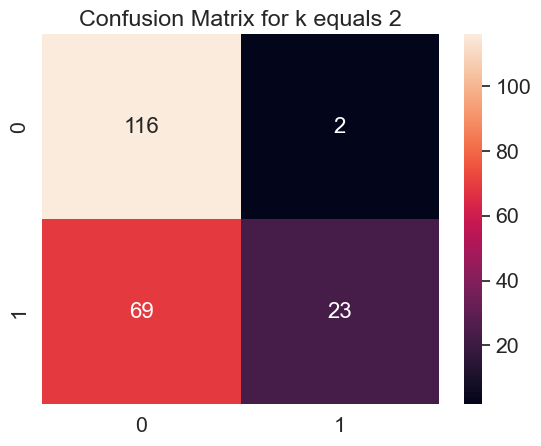

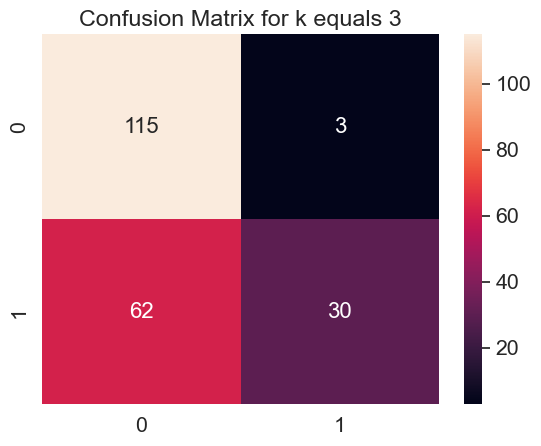

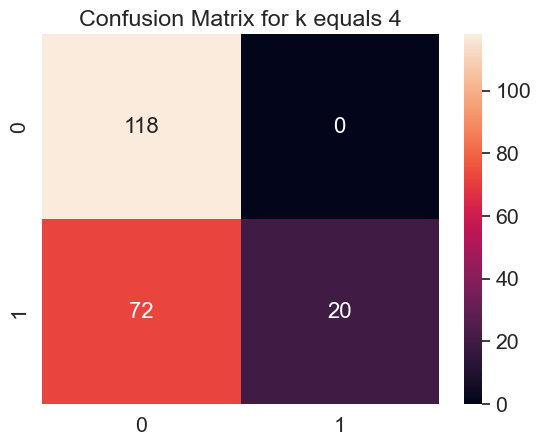

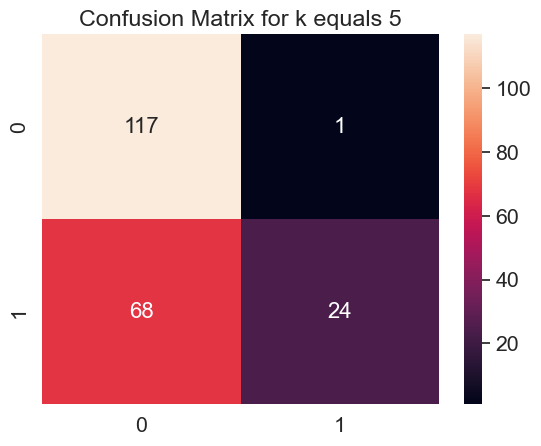

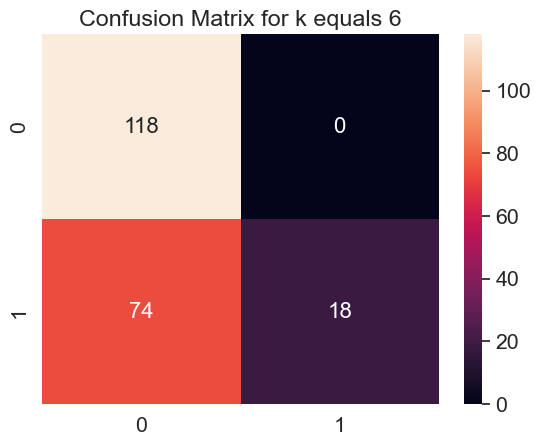

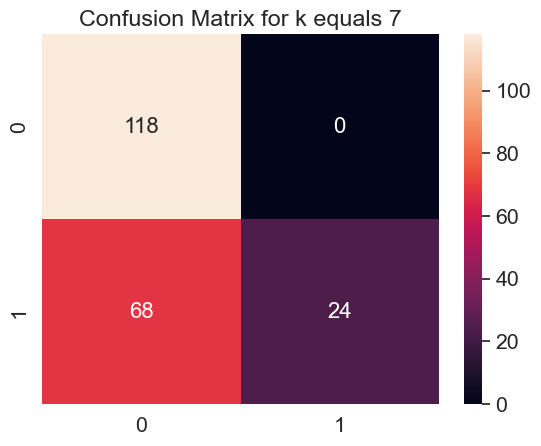

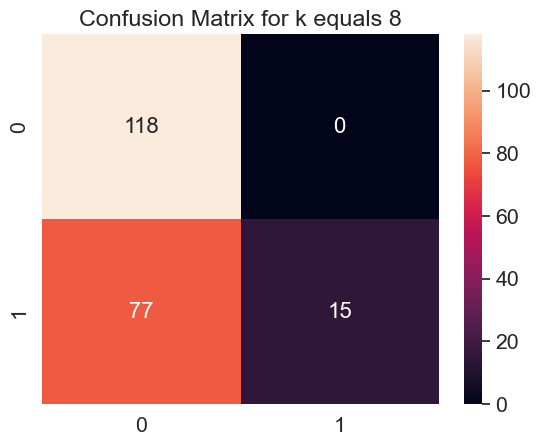

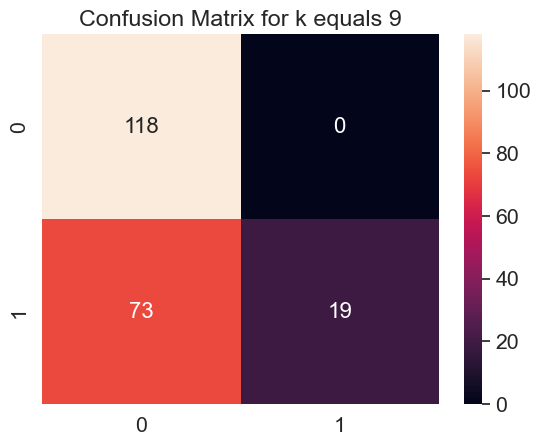

In [20]:
t=0
## for each value of k we will create a confusion matrix
for array in con_matrix:
    df_cm = pd.DataFrame(array)
    sns.set(font_scale=1.4) # for label size
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt = ".0f") # font size
    t += 1
    title = "Confusion Matrix for k equals " + str(t)
    plt.title(title)
    plt.show()

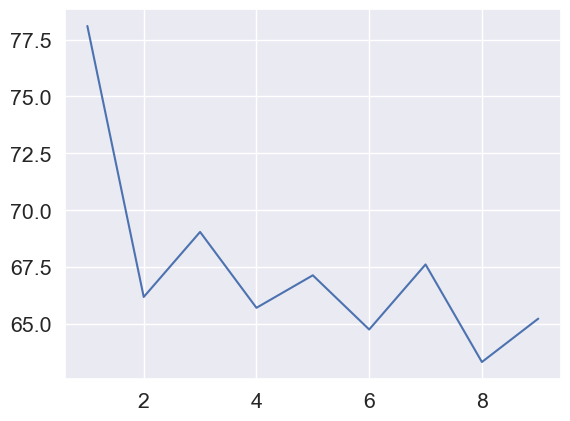

In [21]:
## plot accuracy against
x, y = zip(*list_res)
plt.plot(x, y)
plt.show()

In [22]:
k_best = max(list_res,key=lambda item:item[1])[0]
k_best

1

/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sk

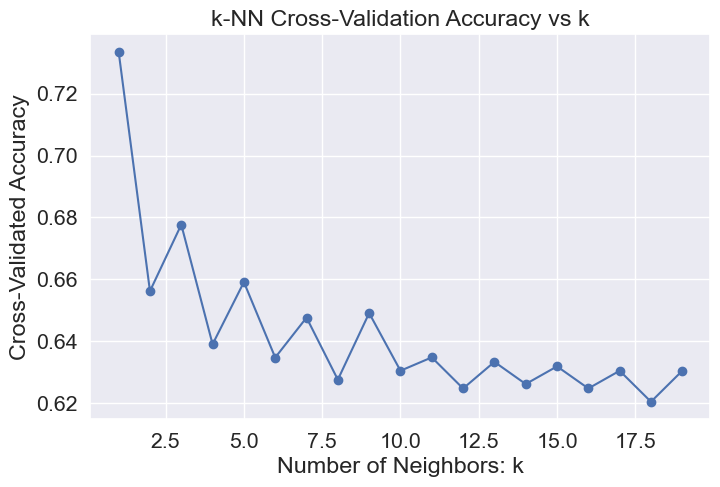

Best k from cross-validation: 1


In [23]:
# Range of k values to try
k_range = range(1, 20)
cv_scores = []

# Evaluate each k using 5-fold cross-validation - #what are folds?
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_images, train_labels, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title("k-NN Cross-Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

In [24]:
# Train final model with best k
best_knn = KNeighborsClassifier(n_neighbors=best_k) #knn to use
best_knn.fit(train_samples, train_samples_labels) #giving it data to plot

# Predict on test data
y_pred = best_knn.predict(test_samples)
print(f"Test Accuracy (k=1): {accuracy_score(test_labels, y_pred):.4f}")

Test Accuracy (k=1): 0.7810


/Users/lucasnseyep/code/LucasNseyep/belle-weder/.venv/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


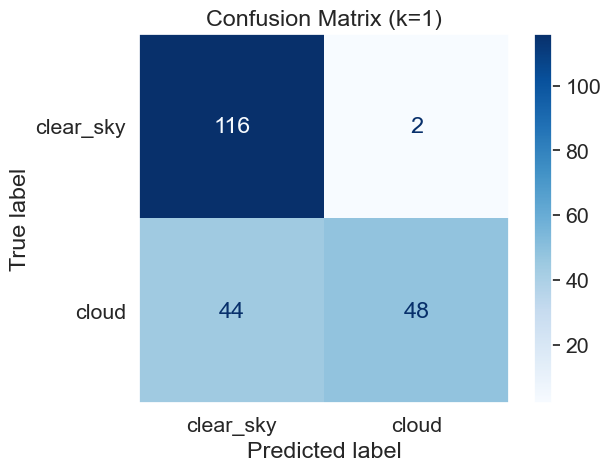

Classification Report:
              precision    recall  f1-score   support

   clear_sky       0.72      0.98      0.83       118
       cloud       0.96      0.52      0.68        92

    accuracy                           0.78       210
   macro avg       0.84      0.75      0.76       210
weighted avg       0.83      0.78      0.77       210



In [25]:
# Confusion Matrix

cm = confusion_matrix(test_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_object[0], class_object[1]])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (k={best_k})")
plt.grid(False)
plt.show()

# Detailed classification report
print("Classification Report:")
print(classification_report(test_labels, y_pred, target_names=[class_object[0], class_object[1]]))

In [26]:
# Classification Report Definitions:
# Precision: How many predicted positives are actually positive.
# Recall: How many actual positives were correctly predicted.
# F1-score: Harmonic mean of precision and recall.
# Support: Number of true instances per class.

In [27]:
# How would you improve the accuracy?

# better data potentially - higher contrast images through more preprocessing like taking a specific colour channel
# more data - the tradeoff would be that the program runs slower though
# different model as knn is bad when we have too many dimensions